Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

Load databases


In [ ]:
suicidio = pd.read_csv("./Suicidios._Colombia__a_os_2016_a_2019.csv")
#censo = pd.read_excel("./PO311_ok.xlsx")

In [ ]:
suicidio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10220 entries, 0 to 10219
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   ID                             10220 non-null  int64 
 1   Año del hecho                  10220 non-null  int64 
 2   Sexo de la victima             10220 non-null  object
 3   Grupo de edad de la victima    10220 non-null  object
 4   Mes del hecho                  10220 non-null  object
 5   Dia del hecho                  10220 non-null  object
 6   Departamento del hecho DANE    10220 non-null  object
 7   Municipio del hecho DANE       10220 non-null  object
 8   Lesion fatal de causa externa  10220 non-null  object
 9   Estado                         10220 non-null  object
dtypes: int64(2), object(8)
memory usage: 798.6+ KB


In [ ]:
#censo.head()

In [ ]:
suicidio.head(5)

,ID,Año del hecho,Sexo de la victima,Grupo de edad de la victima,Mes del hecho,Dia del hecho,Departamento del hecho DANE,Municipio del hecho DANE,Lesion fatal de causa externa,Estado
0,1,2016,Hombre,(20 a 24),Enero,Sábado,Antioquia,Apartadó,Violenta - Suicidios,Datos definitivos
1,2,2016,Hombre,(50 a 54),Enero,Sábado,Quindío,Armenia,Violenta - Suicidios,Datos definitivos
2,3,2016,Mujer,(10 a 14),Enero,Jueves,Quindío,Quimbaya,Violenta - Suicidios,Datos definitivos
3,4,2016,Hombre,(15 a 17),Enero,Domingo,Santander,Bolívar,Violenta - Suicidios,Datos definitivos
4,5,2016,Hombre,(80 y más),Enero,Miércoles,Santander,Barbosa,Violenta - Suicidios,Datos definitivos


In [ ]:
suicidio["Mes del hecho"]=suicidio["Mes del hecho"].str.lower()
d = {'enero':"01", 'febrero':'02', 'marzo':'03', 'abril':'04', 'mayo':'05', 'junio':'06', 'julio':'07', 'agosto':'08', 'septiembre':'09', 'octubre':'10',
    'noviembre':'11', 'diciembre':'12'}

In [ ]:
suicidio["Mes del hecho"]=suicidio["Mes del hecho"].map(d)
suicidio["Mes del hecho"]

0        01
1        01
2        01
3        01
4        01
         ..
10215    10
10216    10
10217    10
10218    12
10219    12
Name: Mes del hecho, Length: 10220, dtype: object

In [ ]:
suicidio["fecha"] = suicidio["Año del hecho"].astype(str)+"-"+suicidio["Mes del hecho"]
suicidio["fecha"]

0        2016-01
1        2016-01
2        2016-01
3        2016-01
4        2016-01
          ...   
10215    2019-10
10216    2019-10
10217    2019-10
10218    2019-12
10219    2019-12
Name: fecha, Length: 10220, dtype: object

In [ ]:
suicidio["fecha"]=pd.to_datetime(suicidio["fecha"],format='%Y-%m')
suicidio["fecha"]

0       2016-01-01
1       2016-01-01
2       2016-01-01
3       2016-01-01
4       2016-01-01
           ...    
10215   2019-10-01
10216   2019-10-01
10217   2019-10-01
10218   2019-12-01
10219   2019-12-01
Name: fecha, Length: 10220, dtype: datetime64[ns]

In [ ]:
suicidio_timeline = suicidio.groupby(["fecha"]).size()
suicidio_timeline

fecha
2016-01-01    187
2016-02-01    190
2016-03-01    191
2016-04-01    175
2016-05-01    185
2016-06-01    203
2016-07-01    192
2016-08-01    215
2016-09-01    164
2016-10-01    217
2016-11-01    178
2016-12-01    213
2017-01-01    206
2017-02-01    183
2017-03-01    181
2017-04-01    231
2017-05-01    253
2017-06-01    221
2017-07-01    232
2017-08-01    213
2017-09-01    178
2017-10-01    222
2017-11-01    227
2017-12-01    224
2018-01-01    234
2018-02-01    182
2018-03-01    229
2018-04-01    218
2018-05-01    231
2018-06-01    224
2018-07-01    238
2018-08-01    223
2018-09-01    230
2018-10-01    230
2018-11-01    231
2018-12-01    226
2019-01-01    225
2019-02-01    191
2019-03-01    235
2019-04-01    221
2019-05-01    225
2019-06-01    231
2019-07-01    216
2019-08-01    237
2019-09-01    223
2019-10-01    216
2019-11-01    191
2019-12-01    232
dtype: int64

Text(0.5, 1.0, 'Número de defunciones por suicidio')

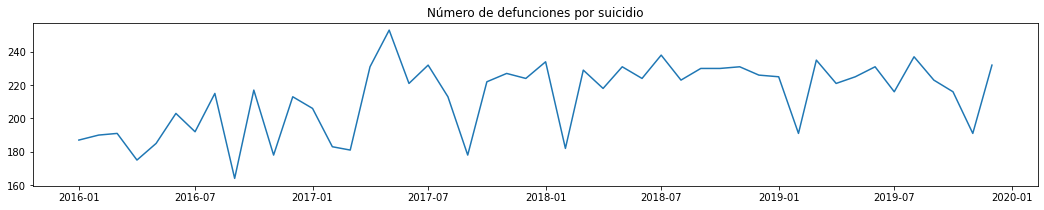

In [ ]:
plt_1 = plt.figure(figsize=(18, 3))
plt.plot(suicidio_timeline)
plt.title("Número de defunciones por suicidio")

Text(0.5, 1.0, 'Casos de suicidio totales por año')

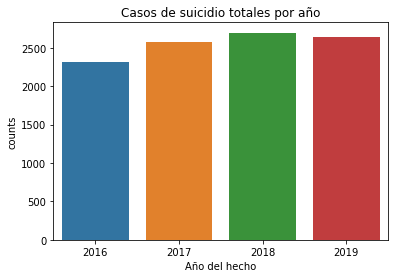

In [ ]:
totalyear= suicidio.groupby(["Año del hecho"]).size().reset_index(name = "counts")
sns.barplot(data = totalyear, x = "Año del hecho", y = "counts")
plt.title('Casos de suicidio totales por año')

Text(0.5, 1.0, 'Casos de suicidio por mes de 2016-2019')

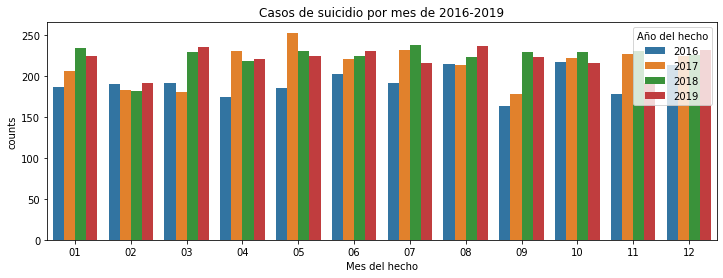

In [ ]:
totalmonth= suicidio.groupby(["Año del hecho", "Mes del hecho"]).size().reset_index(name = "counts")
plt.figure(figsize=(12,4))

sns.barplot(data = totalmonth, x = "Mes del hecho", y = "counts", hue ="Año del hecho")
plt.title('Casos de suicidio por mes de 2016-2019')

In [ ]:
avgmonth = totalyear
avgmonth["counts"] = avgmonth["counts"]/12
avgmonth = avgmonth.rename(columns = { "counts":"Promedio mensual casos"})
avgmonth

,Año del hecho,Promedio mensual casos
0,2016,192.500000
1,2017,214.250000
2,2018,224.666667
3,2019,220.250000


In [ ]:
tasadpto = suicidio.groupby(["Departamento del hecho DANE","Año del hecho"]).size().reset_index(name = "cases")
tasamunicipio = suicidio.groupby(["Municipio del hecho DANE","Año del hecho"]).size().reset_index(name = "cases")
tasadpto.head(5)

,Departamento del hecho DANE,Año del hecho,cases
0,Amazonas,2016,3
1,Amazonas,2017,2
2,Amazonas,2018,4
3,Amazonas,2019,5
4,Antioquia,2016,388


In [ ]:
tasamunicipio.head(5)

,Municipio del hecho DANE,Año del hecho,cases
0,Abejorral,2016,2
1,Abejorral,2017,1
2,Abejorral,2018,4
3,Acacías,2016,8
4,Acacías,2017,4


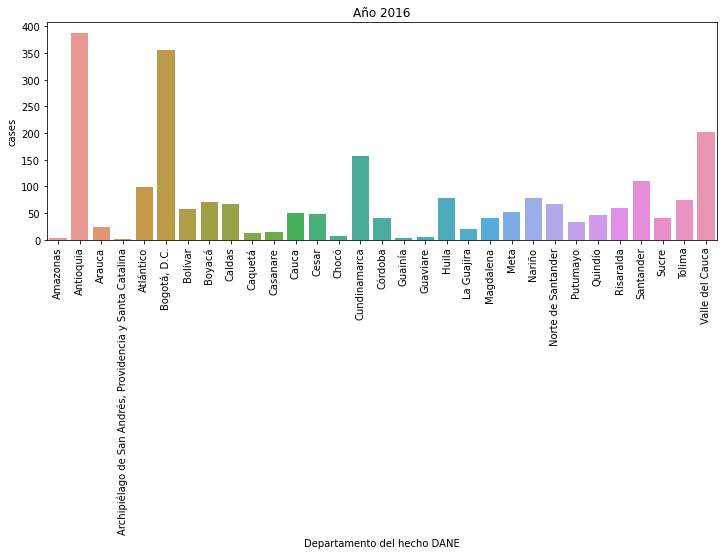

In [ ]:
plt.figure(figsize=(12,4))
g = sns.barplot(x="Departamento del hecho DANE", y = "cases", data = tasadpto[tasadpto["Año del hecho"]==2016])
labels = g.get_xticklabels()
g.set_xticklabels(labels,rotation=90)
plt.title('Año 2016')
plt.show()

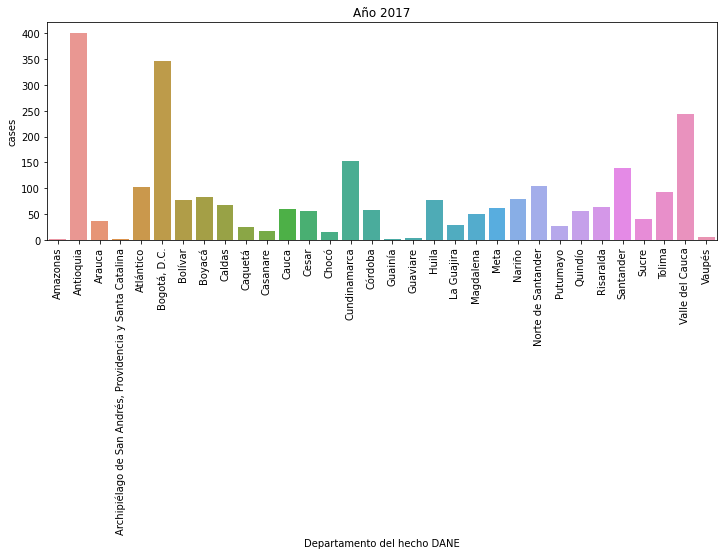

In [ ]:
plt.figure(figsize=(12,4))
g = sns.barplot(x="Departamento del hecho DANE", y = "cases", data = tasadpto[tasadpto["Año del hecho"]==2017])
labels = g.get_xticklabels()
g.set_xticklabels(labels,rotation=90)
plt.title('Año 2017')
plt.show()

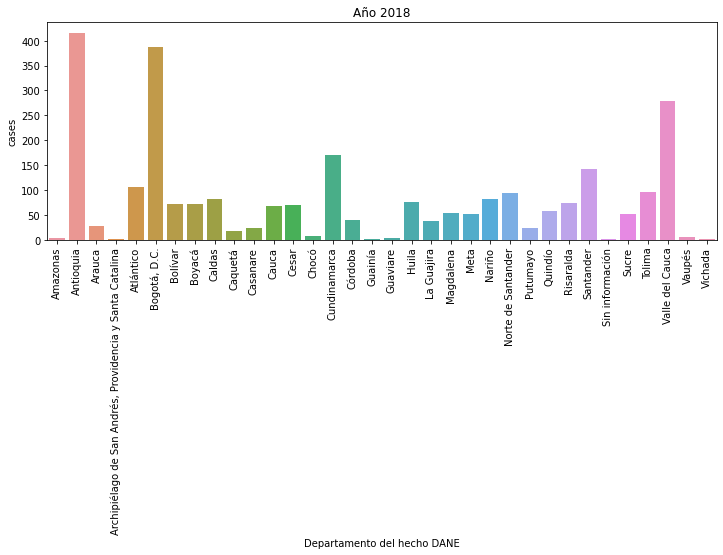

In [ ]:
plt.figure(figsize=(12,4))
g = sns.barplot(x="Departamento del hecho DANE", y = "cases", data = tasadpto[tasadpto["Año del hecho"]==2018])
labels = g.get_xticklabels()
g.set_xticklabels(labels,rotation=90)
plt.title('Año 2018')
plt.show()

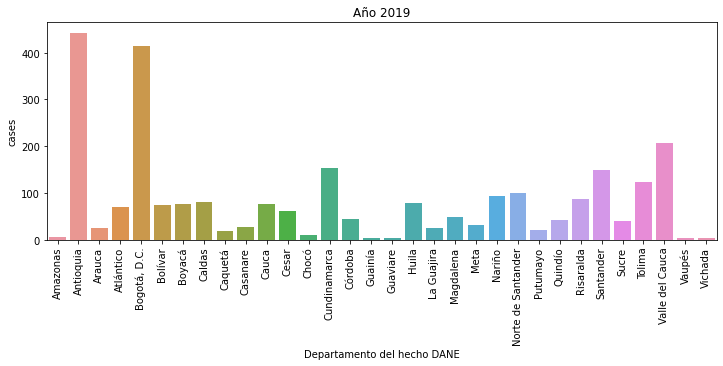

In [ ]:
plt.figure(figsize=(12,4))
g = sns.barplot(x="Departamento del hecho DANE", y = "cases", data = tasadpto[tasadpto["Año del hecho"]==2019])
labels = g.get_xticklabels()
g.set_xticklabels(labels,rotation=90)
plt.title('Año 2019')
plt.show()

Los 5 departamentos con mayor número de suicidios por año (2016-2019)

In [ ]:
tasadpto[tasadpto["Año del hecho"]== 2016].sort_values(by = "cases", ascending = False).head(5)

,Departamento del hecho DANE,Año del hecho,cases
4,Antioquia,2016,388
19,"Bogotá, D.C.",2016,356
120,Valle del Cauca,2016,202
55,Cundinamarca,2016,157
107,Santander,2016,110


In [ ]:
tasadpto[tasadpto["Año del hecho"]== 2017].sort_values(by = "cases", ascending = False).head(5)

,Departamento del hecho DANE,Año del hecho,cases
5,Antioquia,2017,401
20,"Bogotá, D.C.",2017,347
121,Valle del Cauca,2017,244
56,Cundinamarca,2017,152
108,Santander,2017,140


In [ ]:
tasadpto[tasadpto["Año del hecho"]== 2018].sort_values(by = "cases", ascending = False).head(5)

,Departamento del hecho DANE,Año del hecho,cases
6,Antioquia,2018,416
21,"Bogotá, D.C.",2018,387
122,Valle del Cauca,2018,278
57,Cundinamarca,2018,170
109,Santander,2018,143


In [ ]:
tasadpto[tasadpto["Año del hecho"]== 2019].sort_values(by = "cases", ascending = False).head(5)

,Departamento del hecho DANE,Año del hecho,cases
7,Antioquia,2019,443
22,"Bogotá, D.C.",2019,414
123,Valle del Cauca,2019,207
58,Cundinamarca,2019,154
110,Santander,2019,148


Los 5 municipios con mayor número de suicidios por año (2016-2019)

In [ ]:
tasamunicipio[tasamunicipio["Año del hecho"]== 2016].sort_values(by = "cases", ascending = False).head(5)

,Municipio del hecho DANE,Año del hecho,cases
194,"Bogotá, D.C.",2016,356
1028,Medellín,2016,161
263,Cali,2016,82
170,Barranquilla,2016,50
790,Ibagué,2016,46


In [ ]:
tasamunicipio[tasamunicipio["Año del hecho"]== 2017].sort_values(by = "cases", ascending = False).head(5)

,Municipio del hecho DANE,Año del hecho,cases
195,"Bogotá, D.C.",2017,347
1029,Medellín,2017,155
264,Cali,2017,119
171,Barranquilla,2017,53
307,Cartagena de Indias,2017,46


In [ ]:
tasamunicipio[tasamunicipio["Año del hecho"]== 2018].sort_values(by = "cases", ascending = False).head(5)

,Municipio del hecho DANE,Año del hecho,cases
196,"Bogotá, D.C.",2018,387
1030,Medellín,2018,172
265,Cali,2018,119
172,Barranquilla,2018,64
1221,Pasto,2018,44


In [ ]:
tasamunicipio[tasamunicipio["Año del hecho"]== 2019].sort_values(by = "cases", ascending = False).head(5)

,Municipio del hecho DANE,Año del hecho,cases
197,"Bogotá, D.C.",2019,414
1031,Medellín,2019,190
266,Cali,2019,87
793,Ibagué,2019,50
1241,Pereira,2019,47


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=70a6331b-3e37-4c4d-8041-2d29d0ba96c1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>